In [1]:
# install necessary stuff
# !python -m pip install ipykernel
# !python -m pip install pandas
# !python -m pip install intersystems-irispython
# !python -m pip install pyodbc

In [2]:
# Verify PyODBC installation 
!odbcinst -j

unixODBC 2.3.12
DRIVERS............: /opt/homebrew/etc/odbcinst.ini
SYSTEM DATA SOURCES: /opt/homebrew/etc/odbc.ini
FILE DATA SOURCES..: /opt/homebrew/etc/ODBCDataSources
USER DATA SOURCES..: /Users/rsingh/.odbc.ini
SQLULEN Size.......: 8
SQLLEN Size........: 8
SQLSETPOSIROW Size.: 8


In [3]:
import pandas as pd
# import pyodbc 
import iris

In [ ]:
mytable = "Data.Countries"

conn = iris.connect(hostname='localhost', port=1972, namespace='USER', username='rsingh', password='genjisan')
print(conn)
cursor = conn.cursor()


In [ ]:
# make a pandas dataframe
# df = None

try:
  sql = "SELECT * FROM " + mytable
  df = pd.read_sql(sql, conn)
except Exception as inst:
  print(f"Exception! {inst}")

gnp = df.gnp

In [6]:
df.sample(10)

,code,name,continent,region,surface_area,independence_year,population,life_expectancy,gnp,gnp_old,local_name,government_form,head_of_state,capital,code2
170,PNG,Papua New Guinea,Oceania,Melanesia,462840.0,1975,4807000,63.1,4988.0,6328,Papua New Guinea/Papua Niugini,Constitutional Monarchy,Elisabeth II,2884,PG
37,CAN,Canada,North America,North America,9970610.0,1867,31147000,79.4,598862.0,625626,Canada,"Constitutional Monarchy, Federation",Elisabeth II,1822,CA
6,ANT,Netherlands Antilles,North America,Caribbean,800.0,NuLL,217000,74.7,1941.0,NuLL,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Willem-Alexander,33,AN
153,NER,Niger,Africa,Western Africa,1267000.0,1960,10730000,41.3,1706.0,1580,Niger,Republic,Mamadou Tandja,2738,NE
30,BRA,Brazil,South America,South America,8547403.0,1822,170115000,62.9,776739.0,804108,Brasil,Federal Republic,Fernando Henrique Cardoso,211,BR
165,PAN,Panama,North America,Central America,75517.0,1903,2856000,75.5,9131.0,8700,Panama,Republic,Mireya Elisa Moscoso RodrIguez,2882,PA
125,LSO,Lesotho,Africa,Southern Africa,30355.0,1966,2153000,50.8,1061.0,1161,Lesotho,Constitutional Monarchy,Letsie III,2437,LS
118,LAO,Laos,Asia,Southeast Asia,236800.0,1953,5433000,53.1,1292.0,1746,Lao,Republic,Khamtay Siphandone,2432,LA
217,TWN,Taiwan,Asia,Eastern Asia,36188.0,1945,22256000,76.4,256254.0,263451,Tai-wan,Republic,Chen Shui-bian,3263,TW
129,MAC,Macao,Asia,Eastern Asia,18.0,NuLL,473000,81.6,5749.0,5940,Macau/Aomen,Special Administrative Region of China,Jiang Zemin,2454,MO


### Spread: Gross National Products

- range: difference between highest and lowest values 
- interquartile range (IQR): difference between the 75th percentile (Q3) and the 25th percentile (Q1)
- standard deviation: deviation from the mean
- variance: average of the squared differences between each data value and the mean 

In [7]:
print(f"Max: {gnp.max()}")
print(f"Min: {gnp.min()}")
print(f"Range: {gnp.max() - gnp.min()}")
print(f"Interquartile range: {gnp.quantile(0.75) - gnp.quantile(0.25)}")
print(f"Standard deviation: {gnp.std()}")

Max: 8510700.0
Min: 0.0
Range: 8510700.0
Interquartile range: 29304.5
Standard deviation: 637997.578787318


### Center: Gross National Products

- mean: average of all values
- median: middle value (when sorted)
- mode: most frequent value
- midrange: average of the highest and lowest values

In [ ]:
print(f"Mean: {gnp.mean()}")
print(f"Median: {gnp.median()}")
print(f"Mode: {gnp.mode()}")
print(f"Midrange: {(gnp.max()+gnp.min()) / 2 }")

Mean: 122823.88242677823
Median: 4787.0
Mode: 0    0.0
Name: gnp, dtype: float64
Midrange: 4255350.0


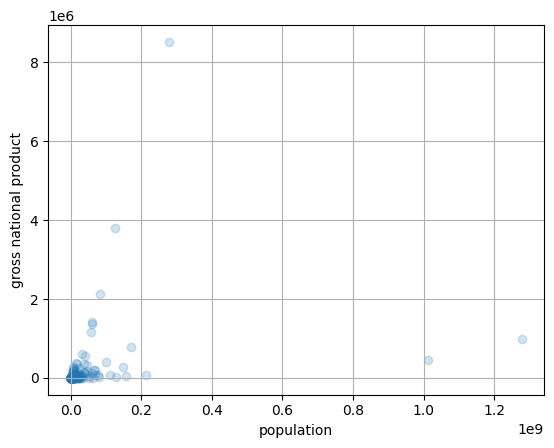

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(df.population, df.gnp, alpha=0.2)
ax.grid(True)
ax.set_ylabel("gross national product")
ax.set_xlabel("population")
plt.show()

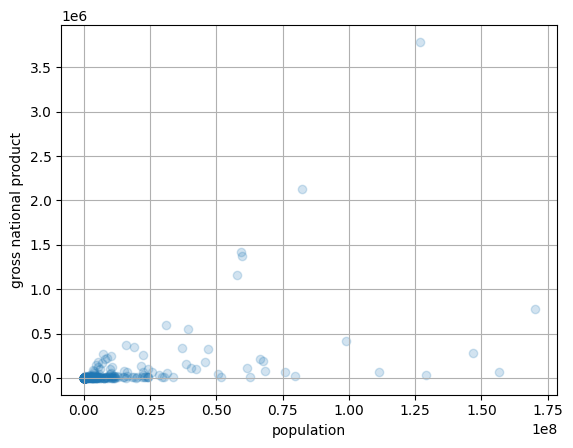

In [13]:
fig, ax = plt.subplots()
df_smaller_pop = df[df.population<(0.2e9)]
ax.scatter(df_smaller_pop.population, df_smaller_pop.gnp, alpha=0.2)
ax.grid(True)
ax.set_ylabel("gross national product")
ax.set_xlabel("population")
plt.show()